<a href="https://colab.research.google.com/github/Youngkwan-Cho/AI_Team_Project/blob/main/Team_Project_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from datetime import datetime, timedelta

text = "root1_220823174615.jpg"
n = 7
result = text[6:n+11]
date_time = datetime.strptime(result, "%y%m%d%H%M%S")
formatted_date_time = date_time.strftime("%Y년 %m월 %d일 %H시 %M분 %S초")

output_list = []

for _ in range(6):
    delta = timedelta(minutes=720)

    # 시간 증가
    new_date_time = date_time + delta

    # 증가된 시간 출력
    formatted_date_time = new_date_time.strftime("%Y년 %m월 %d일 %H시 %M분 %S초")

    date_time = datetime.strptime(formatted_date_time, "%Y년 %m월 %d일 %H시 %M분 %S초")
    formatted_number = date_time.strftime("%y%m%d%H%M%S")

    output_list.append(int(formatted_number))

In [3]:
from PIL import Image
from numpy import asarray
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import glob
import os
import cv2
import tensorflow as tf
from tensorflow import keras
import sys
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
np.random.seed(7)

In [4]:
image_directory = "/content/drive/MyDrive/root1_220823"

x_train = []
y_train = []

# Iterate over the files in the directory
for filename in os.listdir(image_directory):
    # Read the image
    image = cv2.imread(os.path.join(image_directory, filename))
    
    # Check if image is not empty
    if image is not None:
        # Resize the image to match the MNIST dataset size (32x32 pixels)
        try:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # gray_image = cv2.convertScaleAbs(gray_image, alpha= 1.5,beta= 0)
            gray_image  = gray_image[:, 80:-60] 
            gray_image = cv2.resize(gray_image, (32, 32))
 
            x_train.append(gray_image)
            text = filename
            n = 7
            result = text[6: n + 11]
            y_train.append(result)
        except Exception as e:
            print(f"Error processing image {filename}: {str(e)}")

# Convert the training data to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train=x_train.astype('float32')/255.0
n=1

In [5]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1) #1채널 형태로 바꿔야함(data processing에서 중요)
input_shape = (32,32,1)

In [6]:
Tmp=output_list

# Determine the class for each label
y_train_classes = []
for label in y_train:
    label=int(label)
    if label < Tmp[0]:
        class_index = 0
    elif Tmp[0] <= label < Tmp[1]:
        class_index = 1
    elif Tmp[1] <= label < Tmp[2]:
        class_index = 2
    elif Tmp[2] <= label < Tmp[3]:
        class_index = 3
    elif Tmp[3] <= label < Tmp[4]:
        class_index = 4
    elif Tmp[4] <= label < Tmp[5]:
        class_index = 5
    else:
        class_index = 6
    y_train_classes.append(class_index)

# Convert the class labels to one-hot encoded vectors
num_classes = len(Tmp) + 1
y_train_one_hot = keras.utils.to_categorical(y_train_classes, num_classes)

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same')) #64채널에 
model.add(MaxPooling2D(pool_size=(2, 2))) #특징들의 확률을 확실히 정함
model.add(Dropout(0.25)) #트레인 튜런중 일부를 꺼서 오버피팅 막음
model.add(Flatten())  #각 레이어를 통해 추출된 특징들을 2차원에서 1차원으로 바꿔 fully connected layer에 들어가기 전 바꾼다
model.add(Dense(1000, activation='relu')) #입력받는 노드들과 출력으로 나가는 노드들의 개수를 받아 연결한다
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
batch_size = 16
epochs = 50

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_train = model.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=epochs,verbose=1)

Epoch 1/40
36/36 [==============================] - 13s 14ms/step - loss: 0.9640 - accuracy: 0.6250
Epoch 2/40
36/36 [==============================] - 0s 8ms/step - loss: 0.6211 - accuracy: 0.7746
Epoch 3/40
36/36 [==============================] - 0s 7ms/step - loss: 0.4417 - accuracy: 0.8398
Epoch 4/40
36/36 [==============================] - 0s 8ms/step - loss: 0.3549 - accuracy: 0.8715
Epoch 5/40
36/36 [==============================] - 0s 9ms/step - loss: 0.2669 - accuracy: 0.8926
Epoch 6/40
36/36 [==============================] - 0s 7ms/step - loss: 0.2025 - accuracy: 0.9349
Epoch 7/40
36/36 [==============================] - 0s 7ms/step - loss: 0.2222 - accuracy: 0.9067
Epoch 8/40
36/36 [==============================] - 0s 8ms/step - loss: 0.1984 - accuracy: 0.9313
Epoch 9/40
36/36 [==============================] - 0s 10ms/step - loss: 0.2205 - accuracy: 0.9208
Epoch 10/40
36/36 [==============================] - 0s 8ms/step - loss: 0.1792 - accuracy: 0.9296
Epoch 11/40
36/3

18/18 [==============================] - 0s 5ms/step


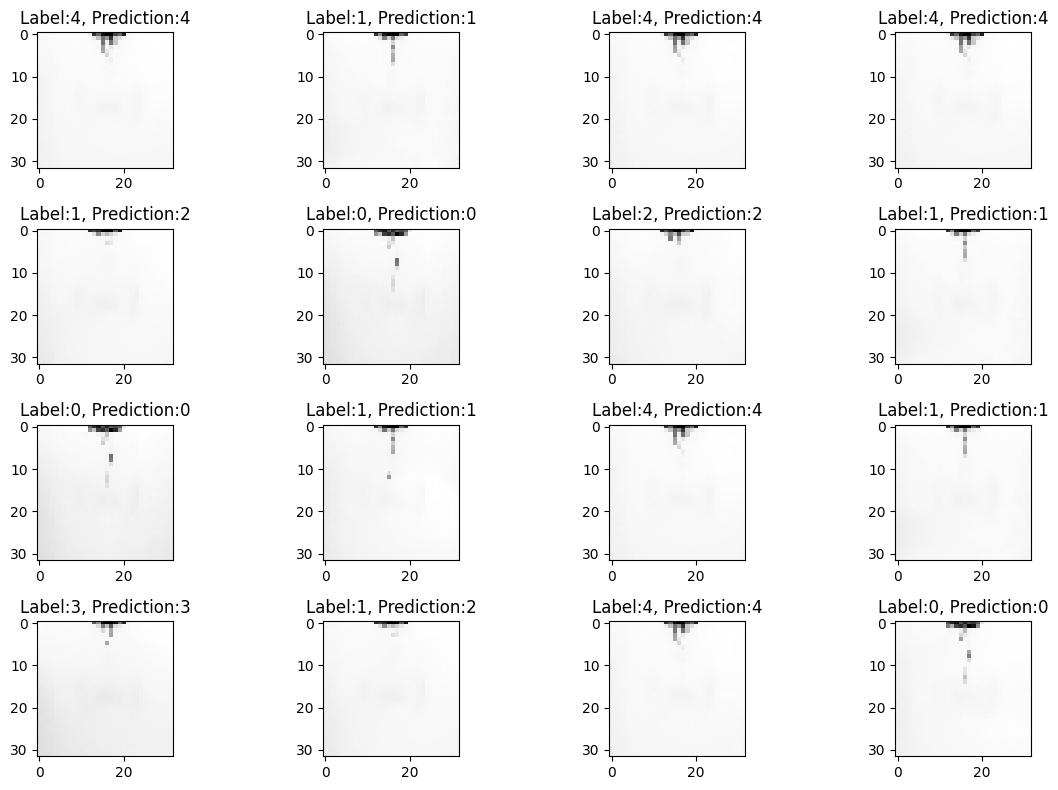

In [9]:
#train_data로 모델을 돌리는 코드
predicted_result = model.predict(x_train)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_train_one_hot, axis=1)
wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
  
samples = random.choices(population=wrong_result, k=16)
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_train[n], cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n]-1)
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [10]:
#test data 전처리
from datetime import datetime, timedelta

text = "root1_220923114836.jpg"
n = 7
result = text[6:n+11]
date_time = datetime.strptime(result, "%y%m%d%H%M%S")
formatted_date_time = date_time.strftime("%Y년 %m월 %d일 %H시 %M분 %S초")

test_output_list = []

for _ in range(6):
    delta = timedelta(minutes=720)

    # 시간 증가
    new_date_time = date_time + delta

    # 증가된 시간 출력
    formatted_date_time = new_date_time.strftime("%Y년 %m월 %d일 %H시 %M분 %S초")

    date_time = datetime.strptime(formatted_date_time, "%Y년 %m월 %d일 %H시 %M분 %S초")
    formatted_number = date_time.strftime("%y%m%d%H%M%S")


    test_output_list.append(int(formatted_number))

In [11]:
image_directory = "/content/drive/MyDrive/root1_220923"

x_test = []
y_test = []

# Iterate over the files in the directory
for filename in os.listdir(image_directory):
    # Read the image
    image = cv2.imread(os.path.join(image_directory, filename))
    
    # Check if image is not empty
    if image is not None:
        # Resize the image to match the MNIST dataset size (32x32 pixels)
        try:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image = cv2.resize(gray_image, (32, 32))
            x_test.append(gray_image)
            text = filename
            n = 7
            result = text[6: n + 11]
            y_test.append(result)
        except Exception as e:
            print(f"Error processing image {filename}: {str(e)}")

# Convert the testing data to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.astype('float32')/255.0
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1) #1채널 형태로 바꿔야함(data processing에서 중요)
input_shape = (32,32,1)

In [12]:
t_Tmp= test_output_list

# Determine the class for each label
y_test_classes = []

for label in y_test:
    label=int(label)
    if label < t_Tmp[0]:
        class_index = 0
    elif t_Tmp[0] <= label < t_Tmp[1]:
        class_index = 1
    elif t_Tmp[1] <= label < t_Tmp[2]:
        class_index = 2
    elif t_Tmp[2] <= label < t_Tmp[3]:
        class_index = 3
    elif t_Tmp[3] <= label < t_Tmp[4]:
        class_index = 4
    elif t_Tmp[4] <= label < t_Tmp[5]:
        class_index = 5
    else:
        class_index = 6        
    y_test_classes.append(class_index)

# Convert the class labels to one-hot encoded vectors
num_classes = len(t_Tmp) + 1
y_test_one_hot = keras.utils.to_categorical(y_test_classes, num_classes)

#np.set_printoptions(threshold=np.inf)

16/16 [==============================] - 0s 6ms/step


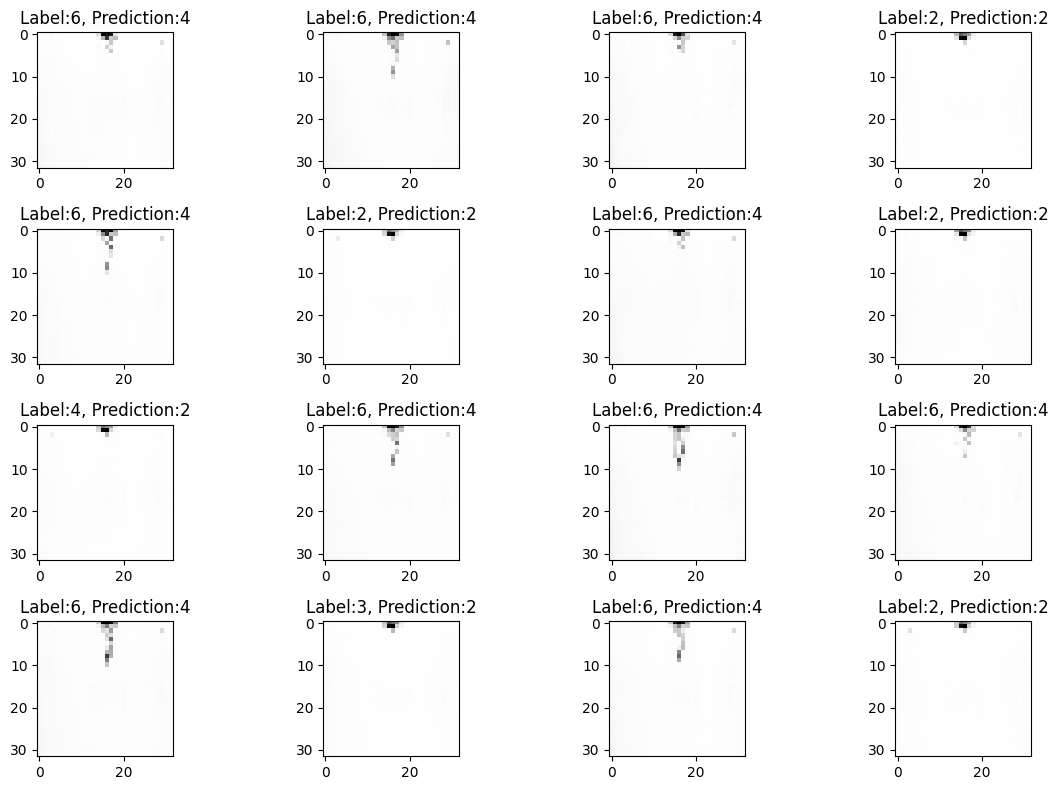

In [13]:
#test_data로 모델을 돌리는 코드
random_numbers = random.sample(range(501), 16)  # Select 15 random numbers from 0 to 500

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test_one_hot, axis=1)
wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
  
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))

for n in random_numbers:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n], cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    # tmp = "Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same')) #64채널에 
model.add(MaxPooling2D(pool_size=(2, 2))) #특징들의 확률을 확실히 정함
model.add(Dropout(0.25)) #트레인 튜런중 일부를 꺼서 오버피팅 막음
model.add(Flatten())  #각 레이어를 통해 추출된 특징들을 2차원에서 1차원으로 바꿔 fully connected layer에 들어가기 전 바꾼다
model.add(Dense(1000, activation='relu')) #입력받는 노드들과 출력으로 나가는 노드들의 개수를 받아 연결한다
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
batch_size = 16
epochs = 50

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_test = model.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=epochs,verbose=1)

Epoch 1/50
36/36 [==============================] - 2s 5ms/step - loss: 1.0162 - accuracy: 0.6320
Epoch 2/50
36/36 [==============================] - 0s 5ms/step - loss: 0.6364 - accuracy: 0.7782
Epoch 3/50
36/36 [==============================] - 0s 5ms/step - loss: 0.4484 - accuracy: 0.8380
Epoch 4/50
36/36 [==============================] - 0s 4ms/step - loss: 0.3707 - accuracy: 0.8662
Epoch 5/50
36/36 [==============================] - 0s 5ms/step - loss: 0.3003 - accuracy: 0.8820
Epoch 6/50
36/36 [==============================] - 0s 5ms/step - loss: 0.2607 - accuracy: 0.9014
Epoch 7/50
36/36 [==============================] - 0s 4ms/step - loss: 0.2288 - accuracy: 0.9120
Epoch 8/50
36/36 [==============================] - 0s 5ms/step - loss: 0.1888 - accuracy: 0.9313
Epoch 9/50
36/36 [==============================] - 0s 5ms/step - loss: 0.1535 - accuracy: 0.9454
Epoch 10/50
36/36 [==============================] - 0s 4ms/step - loss: 0.1778 - accuracy: 0.9384
Epoch 11/50
36/36 [

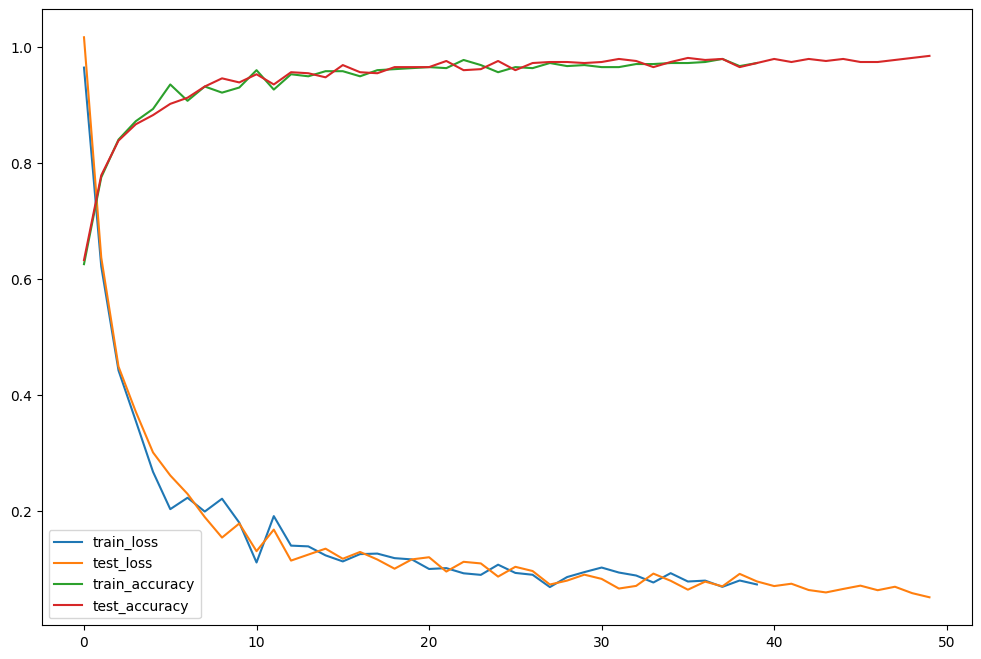

In [15]:
combined_hist = {}
combined_hist['train_loss'] = hist_train.history['loss']
combined_hist['test_loss'] = hist_test.history['loss']
combined_hist['train_accuracy'] = hist_train.history['accuracy']
combined_hist['test_accuracy'] = hist_test.history['accuracy']

plt.figure(figsize=(12, 8))
plt.plot(combined_hist['train_loss'])
plt.plot(combined_hist['test_loss'])
plt.plot(combined_hist['train_accuracy'])
plt.plot(combined_hist['test_accuracy'])
plt.legend(['train_loss', 'test_loss', 'train_accuracy', 'test_accuracy'])
plt.show()